# 資料視覺化 Data visualization

- 資料視覺化（Data Visualization），指的是利用圖形化工具從資料庫、數據檔中萃取有用的資料，經過轉化使其成為易於閱讀、理解的資訊。日常生活中，我們時常運用到資料視覺化工具。
- 做資料分析時，必須記得以"從資料視覺化開始，從資料視覺化結束"，拿到資料的一開始，為了使我們更理解資料間的關係，我們透過資料視覺化來進行輔助，以提供往後分析時的依據，而在做完資料分析後，必須為結果提供呈現，此時的資料視覺化幫助我們讓分析的結果具有說服力，加深結果的理解。
- 繪圖製表時，必須想到這張圖表所能提供的資訊量，以及能否使觀看者能夠容易理解。若所繪的圖表能夠傳達的資訊太少，就不需要繪圖的輔助，另一方面，如果繪圖的結果太複雜、牽涉維度太廣，亦會造成觀看者混淆，造成反效果。
- 本篇主要會介紹在 Python 中主要使用的兩個資料視覺化的函式庫 Matplotlib 以及 Seaborn 兩種工具，並各針對兩者的使用進行簡單介紹

Matplotlib 官方文件: https://matplotlib.org/ <br>
Seaborn 官方文件: https://seaborn.pydata.org/ <br>
以上兩個是在進行資料視覺化時，常使用的兩個套件，Matplotlib的自由度高，Seaborn呈現方式多元成熟，兩者能夠互相搭配使用

-------------------------------------------------------------------------------------------------------------------------------

# 一、Matplotlib

- Matplotlib 同時也是經典的 Python 視覺化繪圖庫， Matplotlib 就是 MATLAB + Plot + Library 的簡稱，因為是模仿 MATLAB 建立的繪圖庫，所以繪圖風格會與 MATLAB 有點類似。
- 能處理幾乎所有二維以及三維的資料視覺化圖形
- 自定義程度高，能夠自由調整各類參數決定圖形的呈現、標籤

# 1. 載入套件

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. 載入資料
這是份包含不同類別鋼鐵的資料，包含長度、亮度、面積等資訊 <br>
鋼鐵的類別為: Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults等，我們希望了解各種鋼鐵類別間，是否有因為不同的屬性差異而造成不同的分類結果，或者是屬性間的相關性，因此可以透過資料視覺化來先進行初步的了解

In [6]:
df = pd.read_csv('faults.csv')
df.head()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
0                    108  ...             0.8182           -0.2913   
1                    123  ...             0.7931           -0.1756   
2                    125  ...             0.6667           -0.1228   
3                    126  ...             0.8444           -0.1568   
4                    126  ...             0.9338           -0.1992   

   SigmoidOfAreas  Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  \
0          0.5822       1          0         0       0          0      0   
1          0.2984       1          0         0       0          0      0   
2          0.2150       1          0         0       0          0      0   
3          0.5212       1          0         0       0          0      0   
4          1.0000       1          0         0       0          0      0   

   Other_Faults  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 34 columns]

# 3. 資料預處理
此處進行簡單的資料預處理，主要是將資料從 dummy variable 換成分類，並且移除一些不需要的欄位

In [7]:
conditions=[(df['Pastry'] == 1) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0), 
            (df['Pastry'] == 0) & (df['Z_Scratch'] == 1)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),
            (df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 1)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),
            (df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 1)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),
            (df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 1)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),
            (df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 1)& (df['Other_Faults'] == 0),
            (df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 1)]
choices = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df['class'] = np.select(conditions, choices)

#Dropping redundant column
#Dropping Hot Encoding Classes
drp_cols=['TypeOfSteel_A400', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df.drop(choices, inplace=True, axis = 1)
df

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0            42         50     270900     270944           267           17   
1           645        651    2538079    2538108           108           10   
2           829        835    1553913    1553931            71            8   
3           853        860     369370     369415           176           13   
4          1289       1306     498078     498335          2409           60   
...         ...        ...        ...        ...           ...          ...   
1936        249        277     325780     325796           273           54   
1937        144        175     340581     340598           287           44   
1938        145        174     386779     386794           292           40   
1939        137        170     422497     422528           419           97   
1940       1261       1281      87951      87967           103           26   

      Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0              44              24220                     76   
1              30              11397                     84   
2              19               7972                     99   
3              45              18996                     99   
4             260             246930                     37   
...           ...                ...                    ...   
1936           22              35033                    119   
1937           24              34599                    112   
1938           22              37572                    120   
1939           47              52715                    117   
1940           22              11682                    101   

      Maximum_of_Luminosity  ...  Edges_X_Index  Edges_Y_Index  \
0                       108  ...         0.4706         1.0000   
1                       123  ...         0.6000         0.9667   
2                       125  ...         0.7500         0.9474   
3                       126  ...         0.5385         1.0000   
4                       126  ...         0.2833         0.9885   
...                     ...  ...            ...            ...   
1936                    141  ...         0.5185         0.7273   
1937                    133  ...         0.7046         0.7083   
1938                    140  ...         0.7250         0.6818   
1939                    140  ...         0.3402         0.6596   
1940                    133  ...         0.7692         0.7273   

      Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
0                      1.0      2.4265       0.9031       1.6435   
1                      1.0      2.0334       0.7782       1.4624   
2                      1.0      1.8513       0.7782       1.2553   
3                      1.0      2.2455       0.8451       1.6532   
4                      1.0      3.3818       1.2305       2.4099   
...                    ...         ...          ...          ...   
1936                   0.0      2.4362       1.4472       1.2041   
1937                   0.0      2.4579       1.4914       1.2305   
1938                   0.0      2.4654       1.4624       1.1761   
1939                   0.0      2.6222       1.5185       1.4914   
1940                   0.0      2.0128       1.3010       1.2041   

      Orientation_Index  Luminosity_Index  SigmoidOfAreas         class  
0                0.8182           -0.2913          0.5822        Pastry  
1                0.7931           -0.1756          0.2984        Pastry  
2                0.6667           -0.1228          0.2150        Pastry  
3                0.8444           -0.1568          0.5212        Pastry  
4                0.9338           -0.1992          1.0000        Pastry  
...                 ...               ...             ...           ...  
1936            -0.4286            0.0026          0.7254  Other_Faults  
1937            -0.4516           -0.0582          0.8173  Other_Faults  
1938            -0.4828 

# 4. 繪圖
本次會介紹 matplotlib 當中的五種圖形的使用與語法，並且以上述鋼鐵資料集來做為範例

1. 直方圖：plt.hist(x)
2. 長條圖：plt.bar(x, y)
3. 散佈圖：plt.scatter(x, y)
4. 盒狀圖：plt.boxplot(x, y)
5. 折線圖：plt.plot(x, y)

## 直方圖
- 直方圖 (histogram)，常被用來表達一組連續值資料的分布 <br>
- 以下以我們觀察在資料集當中的"最小亮度"的分布情形

# 官方文件用法
plt.hist(x, bins=None, range=None, 
         density=None, cumulative=False, 
         histtype='bar', align='mid', 
         orientation='vertical', rwidth=None, 
         color=None, label=None, stacked=False)

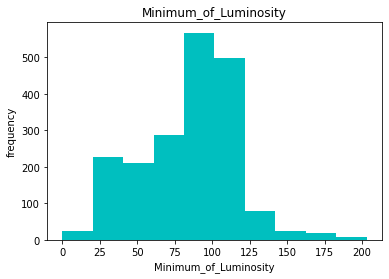

In [8]:
plt.hist(df["Minimum_of_Luminosity"], bins= 10, color='c')  # 畫出直方圖，bins 為區間數
plt.xlabel("Minimum_of_Luminosity")                         # .xlabel在所有圖形中，都作為 x 軸的屬性
plt.ylabel("frequency")                                     # .ylabel在所有圖形中，都作為 y 軸的屬性
plt.title("Minimum_of_Luminosity")                          # .title為替圖片取名
plt.show()

## 疊加兩種直方圖
- 除了了解所有鋼鐵資料的最小亮度分布情形，也可以根據各種類鋼鐵在其中的分布來區分 <br>
- 利用hist當中參數的stacked來進行設定

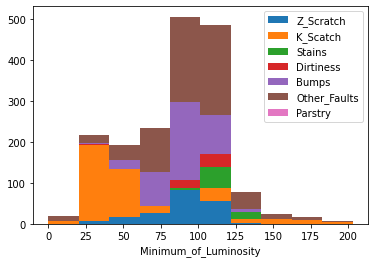

In [10]:
# 先將各類別鋼鐵資料分別選擇出來
df1 = df[df['class'] == 'Z_Scratch']
df2 = df[df['class'] == 'K_Scatch']
df3 = df[df['class'] == 'Stains']
df4 = df[df['class'] == 'Dirtiness']
df5 = df[df['class'] == 'Bumps']
df6 = df[df['class'] == 'Other_Faults']
df7 = df[df['class'] == 'Parstry']
# 利用stacked==True來使各直方圖相疊加，此處注意的是data必須用陣列傳入
plt.hist([df1["Minimum_of_Luminosity"],
          df2["Minimum_of_Luminosity"],
          df3["Minimum_of_Luminosity"],
          df4["Minimum_of_Luminosity"],
          df5["Minimum_of_Luminosity"],
          df6["Minimum_of_Luminosity"],
          df7["Minimum_of_Luminosity"]],
          label=['Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults','Parstry'], 
          stacked=True)
plt.xlabel('Minimum_of_Luminosity')
plt.legend()  # 圖例
plt.show()

## 長條圖
- 長條圖 (Bar Chart)，也是一種常見的視覺化效果，通常是用來表達一組數量資料，可藉此比較類別間的差異
- 此處須留意，長條圖與直方圖並不相同，直方圖通常用在表示連續的數值資料中的分布情況，長條圖為類別差異，因此各類別間可以交換順序
- 範例中我們想了解各類別鋼鐵資料數目的分布情形。

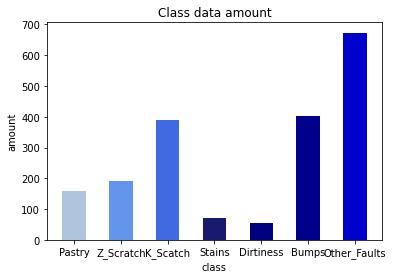

In [17]:
colors=['lightsteelblue', 'cornflowerblue', 'royalblue', 'midnightblue', 'navy', 'darkblue', 'mediumblue']
count = df["class"].value_counts(sort=False) 
y = [count[i] for i in choices]

plt.bar(df['class'].unique(), y, color=colors, width=0.5)  # x軸傳入class類別，y軸計算各類別資料數量
plt.xlabel('class')
plt.ylabel('amount')
plt.title('Class data amount')
plt.show()

- 另一方面，在視覺化當中，我們可以在既有的圖形上再畫上我們所需要的線
- 比方說我們想了解在資料集當中，哪些類別的資料不足 200 筆，可以拉出標準線
- 這邊所使用的是 axhline() 的方法，可針對 y 軸的數值，拉出一條水平線（如果要拉垂直線的話使用 avhline()）

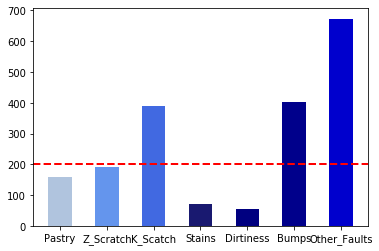

In [183]:
plt.bar(df['class'].unique(), y, color=colors, width=0.5) # x軸傳入class類別，y軸計算各類別資料數量
plt.axhline(y=200, c="r", ls="--", lw=2) # axhline y=200代表設定標準
plt.show()

## 散佈圖
- 散佈圖 (Scatter Plot)，通常用於描繪兩筆資料之間的相關程度，在進行機器學習或是資料科學的運用時，這樣的特性也使其多被用在 feature engineering 時的參考，是一種很常見的圖形
- 舉例來說，我們可以透過以下範例我們可以看到鋼鐵面積與總亮度呈現正相關。

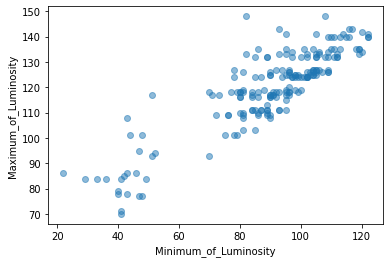

In [25]:
plt.scatter('Minimum_of_Luminosity', "Maximum_of_Luminosity", data=df[df["class"] == "Z_Scratch"], alpha=0.5)
plt.xlabel('Minimum_of_Luminosity')
plt.ylabel('Maximum_of_Luminosity')
plt.show()

- 除了觀察屬性間的關係，也可以以顏色去區別各資料的分群分布情形
- 此處觀察了在最大長寬的關係下，各鋼材的分布情形
- 當中很明顯的可以發現，Z_Scratch 種類的鋼鐵在長寬的最大長度上，幾乎都比其他兩種類的鋼鐵還短

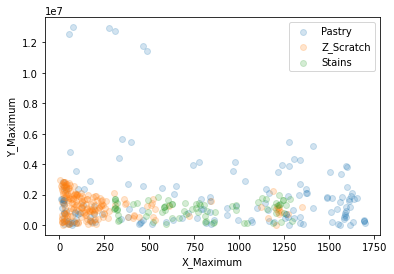

In [26]:
df1 = df[df['class'] == 'Pastry']
df2 = df[df['class'] == 'Z_Scratch']
df3 = df[df['class'] == 'Stains']
plt.scatter('X_Maximum', "Y_Maximum", data=df1, alpha=0.2, label="Pastry")    # 此處用 label 先標記該點圖的屬性
plt.scatter('X_Maximum', "Y_Maximum", data=df2, alpha=0.2, label="Z_Scratch") # 此處用 label 先標記該點圖的屬性
plt.scatter('X_Maximum', "Y_Maximum", data=df3, alpha=0.2, label="Stains")    # 此處用 label 先標記該點圖的屬性
plt.legend() #將前面用label標記的點以圖例的方式表示
plt.xlabel('X_Maximum')
plt.ylabel('Y_Maximum')
plt.show()

## 盒鬚圖
- 盒鬚圖 (Box Plot)，通常用來表達一組數據資料裡面，不同類別資料之間的分布差異與程度
- 以下範例以三種類別鋼鐵當中各自的最小亮度分布做盒狀圖呈現
- 可以注意到雖然盒狀圖有分上下界，但仍有一些圓點的出現，在matplotlib當中叫做 fliers，其實就是超過預設範圍（大於第三四分位數 ＋1.5 四分位距，或是小於第一四分位數 −1.5 四分位距）的那些資料點，也可以稱作為 outlier(離群值)。
- 盒鬚圖最主要能夠理解資料的分布情形，以及找出離群值，而離群值的處理在其他篇章亦會說明。

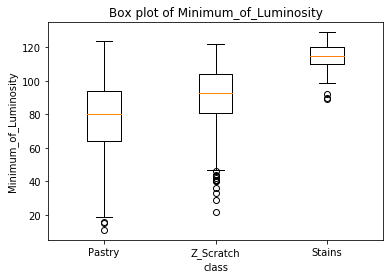

In [181]:
plt.boxplot([df[df["class"] == "Pastry"].Minimum_of_Luminosity, 
             df[df["class"] == "Z_Scratch"].Minimum_of_Luminosity,
             df[df["class"] == "Stains"].Minimum_of_Luminosity], 
             labels = ["Pastry", "Z_Scratch", "Stains"])
plt.ylabel('Minimum_of_Luminosity')
plt.xlabel('class')
plt.title('Box plot of Minimum_of_Luminosity')
plt.show()

## 折線圖
- 折線圖 (Line Plot)，常用於呈現單一資料的時間趨勢，或是單一資料的不同群體的時間趨勢，故經常使用在時間序列類型的資料上。
- 目前所使用的鋼鐵資料集當中並無時間序列類型的資料，這邊就先以其他資料進行繪圖

In [30]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]
stock_tsmcc = [255,246,247.5,227,224,216.5,246,256,262.5,234,225.5,225.5]
stock_foxconnn = [92.2,88.1,88.5,82.9,85.7,83.2,83.8,80.5,79.2,78.8,71.9,70.8]

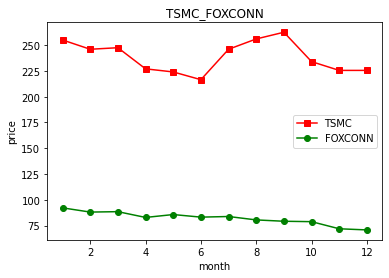

In [31]:
plt.plot(month, stock_tsmcc, 's-', color='r', label="TSMC")
plt.plot(month, stock_foxconnn, 'o-', color='g', label="FOXCONN")
plt.title("TSMC_FOXCONN")
plt.xlabel("month")
plt.ylabel("price")
plt.legend()
plt.show()

# 二、 Seaborn

- Seaborn 亦是在 python 上十分受歡迎的資料視覺化函式庫，在 Matplotlib 的基礎上，進行了更高級的封裝，使得作圖更加方便快捷
- 因為基於 Matplotlib 的基礎上使用，故也可以在 Seaborn 所產生的圖上，以 Matplotlib 再進行繪圖工作
- 語法簡單，但自定義性沒有 Matplotlib 高，但可用 Matplotlib 補足

In [32]:
import seaborn as sns

## 直方圖

- 因為屬於較高階的視覺化函式庫，在繪圖時比用 matplotlib 有更完整的功能
- 可以看到 seaborn 的圖不只不需要自定x軸，甚至連核密度估計曲線都畫出來
- 若不需要的話也可以將 kde 設為false

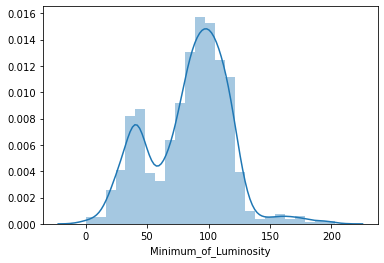

In [9]:
sns.distplot(df["Minimum_of_Luminosity"], kde=True, bins=25)

## 長條圖

- 長條圖的話多了新的選擇，以下是兩種計算各鋼鐵數量的長條圖
- 分別為普通的barplot以及較簡短的countplot
- Seaborn也建立了許多好用的進階視覺圖的函式，可以到官方文件詳閱

<AxesSubplot:>

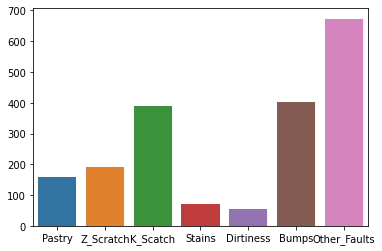

In [34]:
count = df["class"].value_counts(sort=False) 
y = [count[i] for i in choices]

sns.barplot(x = df["class"].unique(), y=y)

<AxesSubplot:xlabel='class', ylabel='count'>

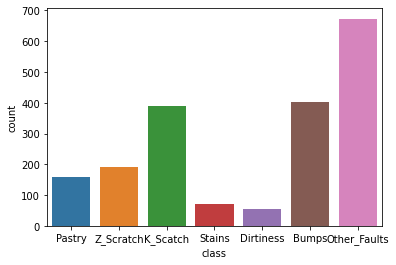

In [37]:
sns.countplot(x=df['class'])

## 散佈圖

- 散佈圖的話 Seaborn 也有建立許多進階表示圖
- 首先是 stripplot，比較類似於初始的散佈圖
- 再來是 swarmplot，它可以更好地表示觀測的分布，它適用於相對較小的數據集
- 另一個是 jointplot，可以調整不同的 king 去決定散佈圖的型態，kind 的選擇有 scatter、reg、resid、kde、hex

<AxesSubplot:xlabel='class', ylabel='Y_Minimum'>

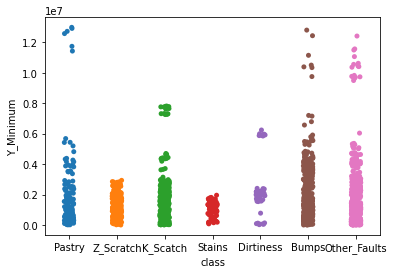

In [38]:
sns.stripplot(x=df['class'], y=df["Y_Minimum"], jitter=1)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

<AxesSubplot:xlabel='class', ylabel='Y_Minimum'>

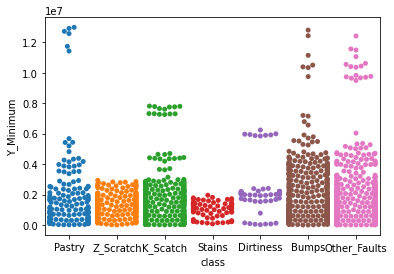

In [39]:
sns.swarmplot(x=df['class'], y=df["Y_Minimum"])

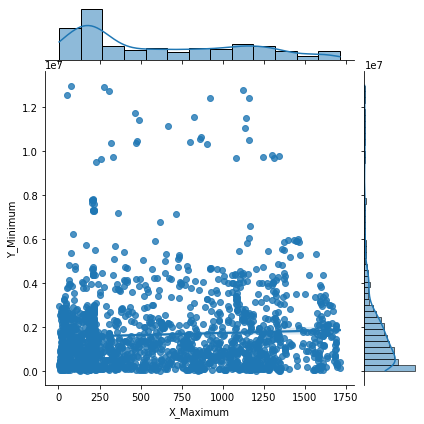

In [51]:
sns.jointplot(x='X_Maximum', y='Y_Minimum', data=df, kind='reg')  # kind的選擇有 scatter、reg、resid、kde、hex

## 盒狀圖

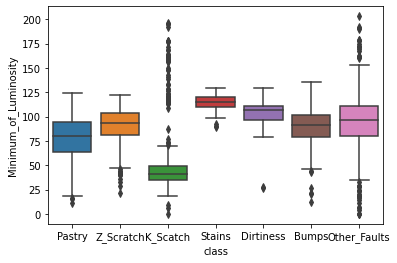

In [15]:
sns.boxplot(x='class', y='Minimum_of_Luminosity', data=df)

## 小提琴圖
- 類似於盒鬚圖的延伸，可以更明顯容易的看到資料在分布當中的關係
- 舉例來說，Z_Scratch 種類的鋼鐵雖然大部分的最小亮度集中在 100 單位亮度區間，但是可以發現在 50 單位亮度左右亦有一小部分的資料集中。

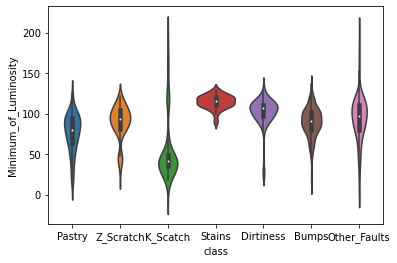

In [16]:
sns.violinplot(x= 'class', y = 'Minimum_of_Luminosity', data = df)

## 

## Pair plot
- 用來表示兩兩變數之間的關係，主對角線為直方圖，上三角與下三角矩陣為兩變數之間的散佈圖。

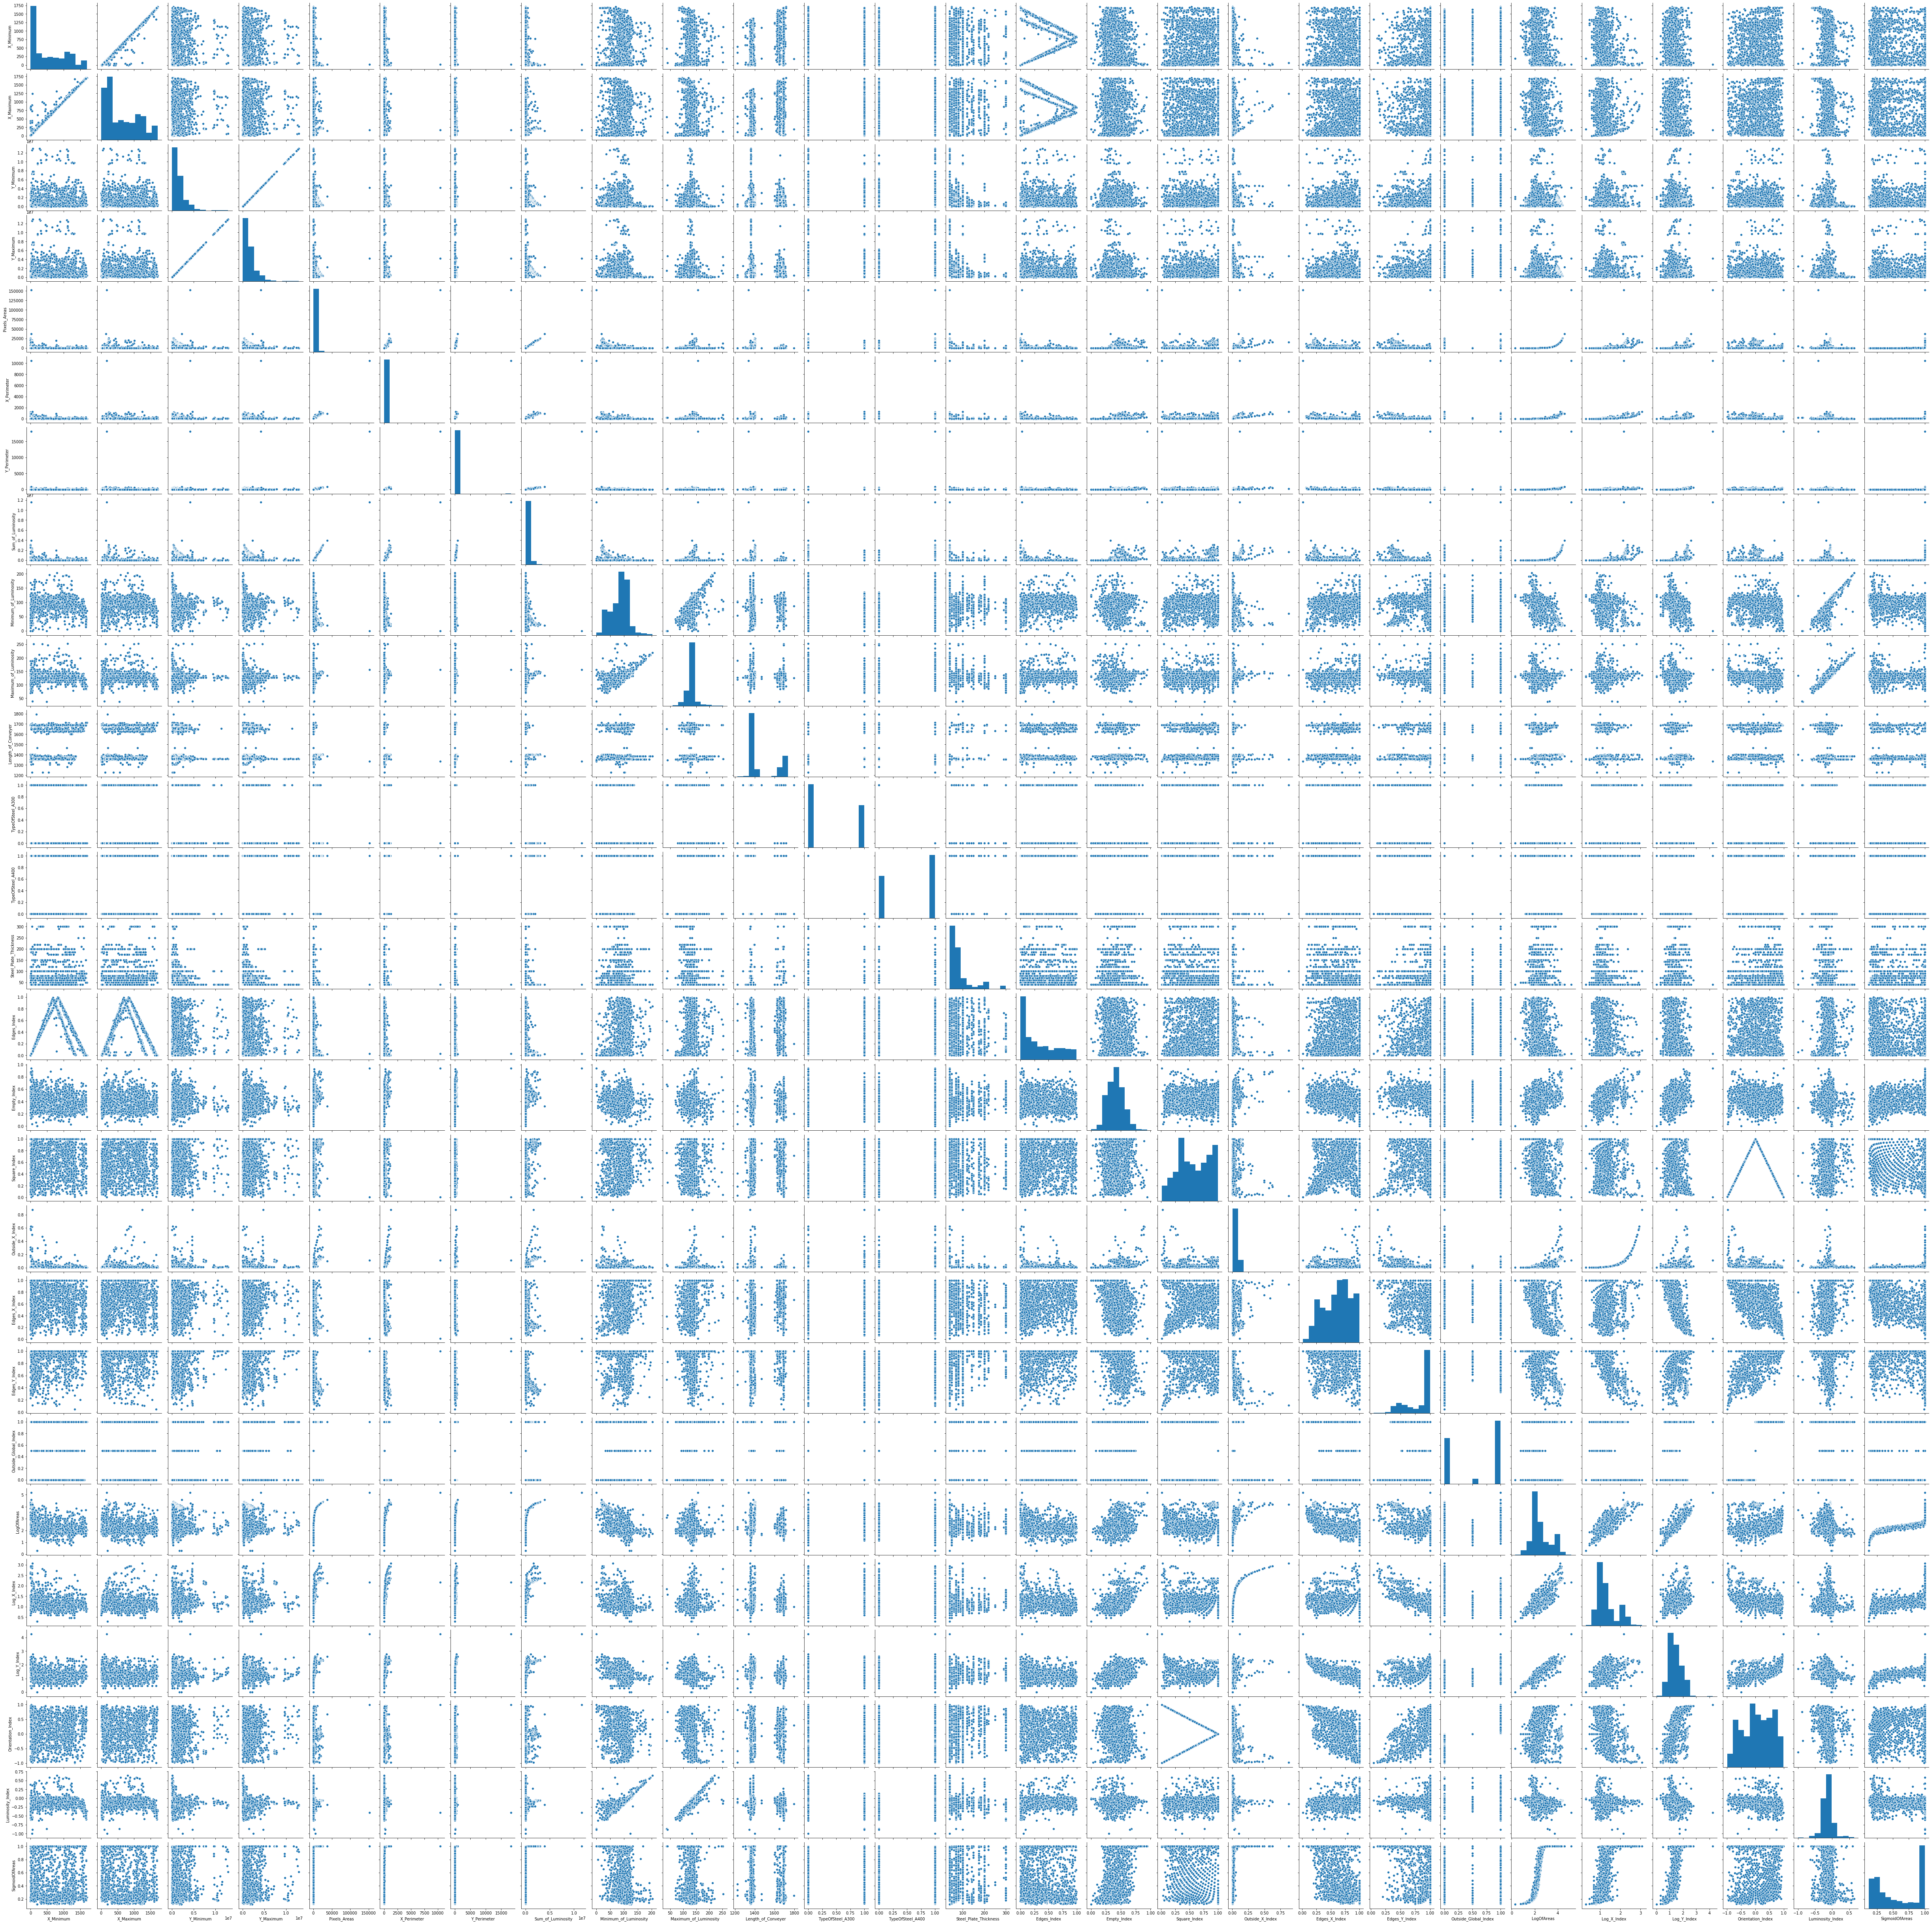

In [186]:
sns.pairplot(df)